In [1]:
import pandas as pd 
from numpy import*
import re
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
erp = pd.read_csv('erp.csv')
erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
web = pd.read_excel('web.xlsx')
web.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
liaison = pd.read_excel('liaison.xlsx')
liaison.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296


###  Checklist de base

In [6]:
erp_copie= erp.copy()

#### Analyse de forme erp

In [7]:
# variable target: price
# lignes et colonnes: 825,5
# types de variables: qualitatif:       quantitatif:
#int64      3
#float64    1
#object     1
#dtype: int64
# analyse des valeurs manquantes: pas de NAN

In [8]:
erp_copie.shape

(825, 5)

In [9]:
erp_copie.dtypes.value_counts()

int64      3
float64    1
object     1
dtype: int64

<AxesSubplot:>

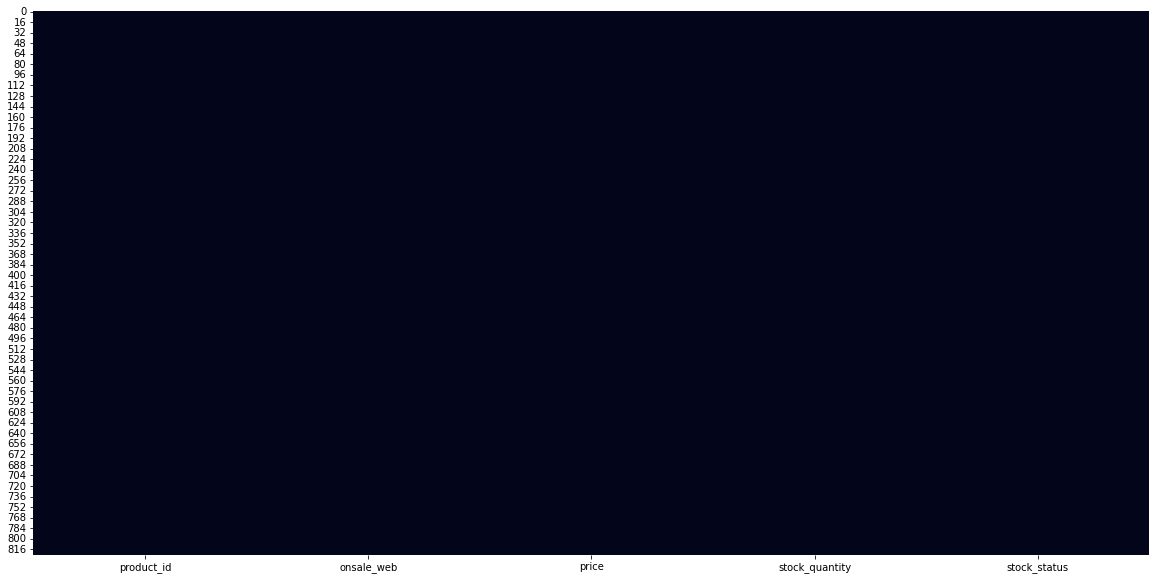

In [10]:
plt.figure( figsize=(20,10))
sns.heatmap( erp.isna(), cbar= False)

####  analyse de forme web

In [11]:
# variable target: SKU
# lignes et colonnes:1431,28
# types de variables: qualitatif:      quantitatif:
#object            11
#float64           10
#datetime64[ns]     4
#int64              3
#dtype: int64
# analyse des valeurs manquantes: il y a  4 groupe de colonnes 100% de valeurs manquantes et trois groupes de colonnes avec 50% de valeurs manquantes

In [12]:
web_copie= web.copy()

In [13]:
web_copie.shape

(1513, 28)

In [14]:
web_copie.dtypes.value_counts()

object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64

<AxesSubplot:>

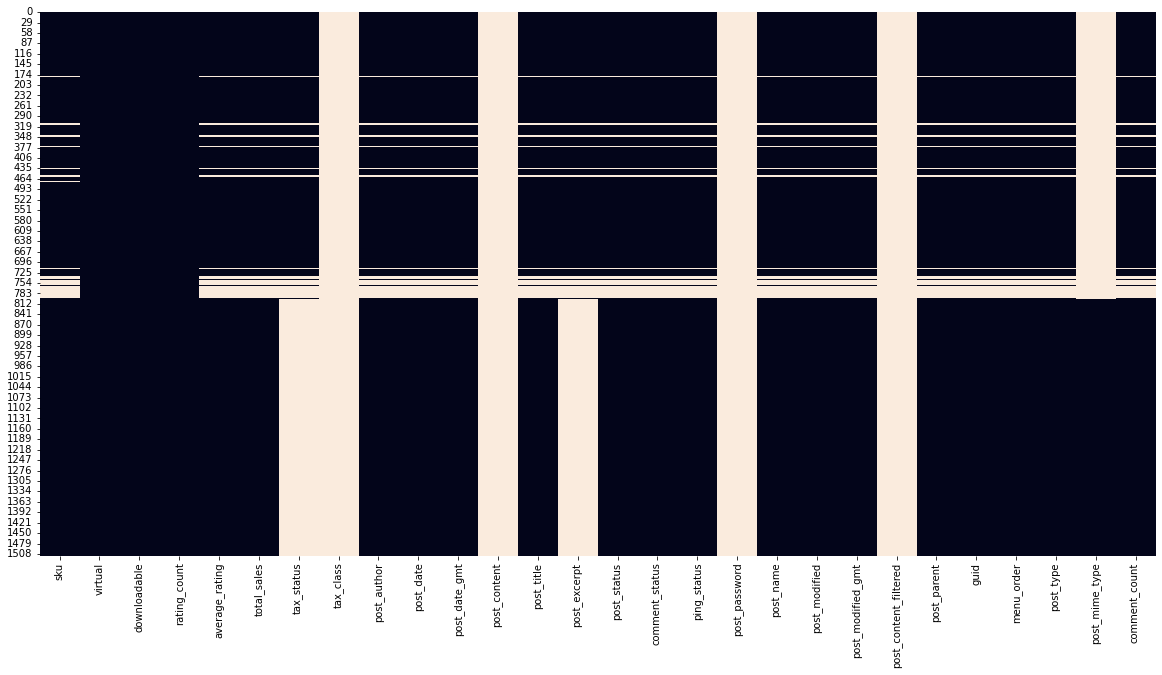

In [15]:
plt.figure( figsize=(20,10))
sns.heatmap( web_copie.isna(), cbar= False)

In [16]:
(web_copie. isna().sum()/ web_copie.shape [0]). sort_values( ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.054858
post_modified_gmt        0.054858
ping_status              0.054858
comment_status           0.054858
post_status              0.054858
post_parent              0.054858
post_title               0.054858
guid                     0.054858
post_date                0.054858
post_name                0.054858
post_author              0.054858
menu_order               0.054858
post_type                0.054858
total_sales              0.054858
average_rating           0.054858
post_date_gmt            0.054858
post_modified            0.054858
sku                      0.056180
tax_status               0.526768
post_excerpt             0.526768
post_mime_type           0.528090
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

In [17]:
web_copie.loc[web_copie['sku'].duplicated(keep=False),:]
web_copie

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


#### Analyse de forme liaison

In [18]:
liaison_copie= liaison.copy()
liaison_copie.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [19]:
# variable target: id_web
# lignes et colonnes:825,2
# types de variables: qualitatif:      quantitatif:
# analyse des valeurs manquantes: un peu de valeurs manquantes 

In [20]:
liaison_copie.shape

(825, 2)

In [21]:
liaison_copie.dtypes.value_counts()

int64     1
object    1
dtype: int64

<AxesSubplot:>

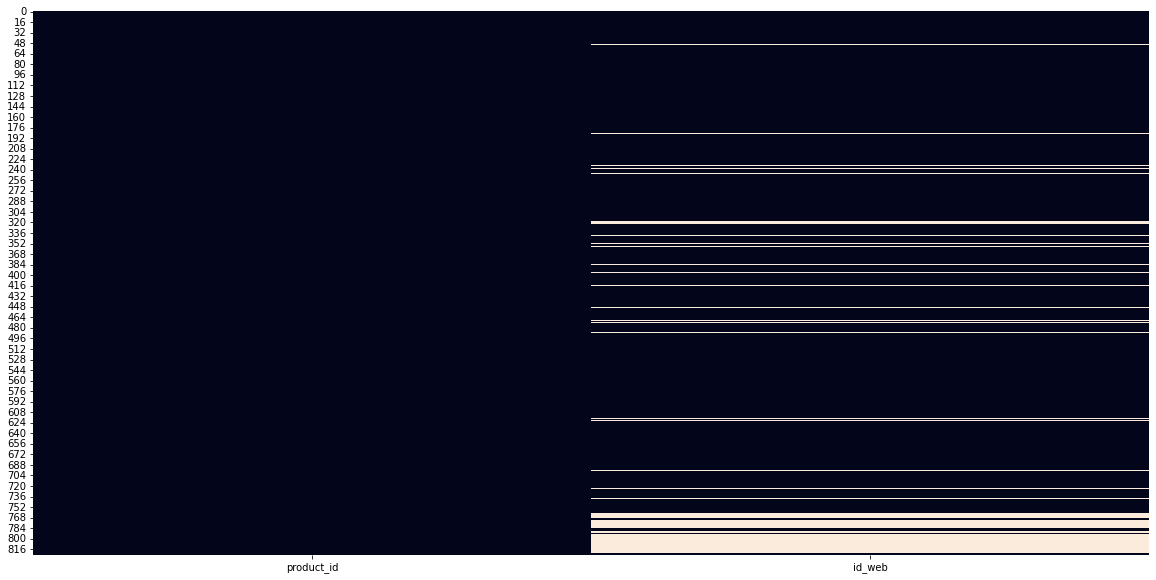

In [22]:
plt.figure( figsize=(20,10))
sns.heatmap( liaison_copie.isna(), cbar= False)

In [23]:
(liaison_copie. isna().sum()/ liaison_copie.shape [0]). sort_values( ascending=True)

product_id    0.000000
id_web        0.110303
dtype: float64

# Analyse du fond

## Visualisation initiale : élimination des colonnes inutiles et nettoyage

In [24]:
web_copie= web_copie [web_copie.columns[web. isna().sum()/ web.shape [0] <1]]

In [25]:
web_copie.shape

(1513, 24)

In [26]:
web_copie.drop_duplicates(inplace=True)

C:\Users\ibenz\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
web_copie[ web_copie['post_type'] == 'attachment' ] .index

Int64Index([ 799,  800,  801,  802,  803,  804,  805,  806,  807,  808,
            ...
            1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512],
           dtype='int64', length=714)

In [28]:
web_copie.drop( web_copie[ web_copie['post_type'] == 'attachment' ].index , inplace=True)

C:\Users\ibenz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            717 non-null    int64         
 2   downloadable       717 non-null    int64         
 3   rating_count       717 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_statu

In [30]:
web_copie= web_copie.dropna(subset=['sku'])
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

In [31]:
erp_copie.drop_duplicates(inplace=True)
erp_copie.tail()

,product_id,onsale_web,price,stock_quantity,stock_status
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock
824,7338,1,16.3,45,instock


In [32]:
liaison_copie.drop_duplicates(inplace=True)
liaison_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


In [33]:
erp_liaison = pd.merge (erp_copie,liaison_copie , on = 'product_id', how = 'outer' )
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [34]:
# Changer le type de la colonne product_id en object pour pouvoir merger après avec la data web
erp_liaison["product_id"] = erp_liaison["product_id"]. astype (str)

In [35]:
# Renommer la colonne SKU dans la data web pour pouvoir merger on id_web après erp_liaison
web_copie=web_copie.rename( columns={"sku": "id_web"})

In [36]:
# Merger les deux dataframes web_copie et erp_liaison how= outer
erp_liaison_web= pd. merge(web_copie, erp_liaison , on='id_web', how='outer')
erp_liaison_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
4,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock
821,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock
822,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock
823,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock


In [37]:
# Ajouter une colonne dans le tableau de la data erp_laison_web et calculer le chiffre d'affaire par produit en utilisant la multiplication
erp_liaison_web ["CA_par_produit"] = erp_liaison_web["total_sales"] * erp_liaison_web["price"]
erp_liaison_web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,instock,250.0
1,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2
2,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0
3,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0
4,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock,NaN
821,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock,NaN
822,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock,NaN
823,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock,NaN


In [38]:
# Calculer le chiffre d'affaires Total en euro
CA_total_enligne= erp_liaison_web ['CA_par_produit'].sum()
CA_total_enligne

70568.6

In [39]:
erp_liaison_web_1=erp_liaison_web

In [40]:
erp_liaison_web_1.drop_duplicates()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,instock,250.0
1,15298,0.0,0.0,0.0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2
2,15296,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0
3,15300,0.0,0.0,0.0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0
4,19814,0.0,0.0,0.0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock,NaN
821,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock,NaN
822,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock,NaN
823,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock,NaN


In [41]:
len(erp_liaison_web_1 ['virtual'].unique())

2

In [42]:
len(erp_liaison_web_1 ['downloadable'].unique())

2

In [43]:
len(erp_liaison_web_1 ['rating_count'].unique())

2

In [44]:
len(erp_liaison_web_1 ['tax_status'].unique())

2

In [45]:
len(erp_liaison_web_1 ['menu_order'].unique())

2

In [46]:
len(erp_liaison_web_1 ['post_type'].unique())

2

In [47]:
len(erp_liaison_web_1 ['post_mime_type'].unique())

1

In [48]:
len(erp_liaison_web_1 ['comment_count'].unique())

2

In [49]:
len(erp_liaison_web_1 ['average_rating'].unique())

2

In [50]:
len(erp_liaison_web_1 ['post_parent'].unique())

2

In [51]:
len(erp_liaison_web_1 ['ping_status'].unique())

2

In [52]:
len(erp_liaison_web_1 ['onsale_web'].unique())

2

In [53]:
erp_liaison_web_1=erp_liaison_web_1.drop(['virtual', 'downloadable' ,'rating_count','tax_status','menu_order','post_type','post_mime_type','comment_count','average_rating','post_parent','ping_status','post_status','comment_status'], axis = 1)
erp_liaison_web_1

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,4954,1,25.0,0,instock,250.0
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,3847,1,24.2,0,outofstock,145.2
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,3849,1,34.3,0,outofstock,0.0
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,3850,1,20.8,0,outofstock,0.0
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,4032,1,14.1,0,outofstock,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,15609,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5954,0,18.8,0,outofstock,NaN
821,14377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5955,0,27.3,0,outofstock,NaN
822,13577,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5957,0,39.0,0,outofstock,NaN
823,15529,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,6100,0,12.9,0,outofstock,NaN


In [54]:
erp_liaison_web_1.dropna(axis=0)
erp_liaison_web_1.sample(6)

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit
75,1364,0.0,2.0,2018-02-13 13:36:44,2018-02-13 12:36:44,Champagne Mailly Grand Cru Brut Rosé,Une somptueuse robe rose lumineuse habille cet...,champagne-mailly-grand-cru-brut-rose,2020-08-08 10:45:03,2020-08-08 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,4148,1,37.5,18,instock,0.0
818,14689,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,5800,0,32.3,0,outofstock,NaN
346,13754,0.0,2.0,2018-04-19 13:45:11,2018-04-19 11:45:11,Maurice Schoech Pinot Gris Vendanges Tardives ...,"Vendangé en un seul passage, les raisins de Pi...",maurice-schoech-pinot-gris-vendanges-tardives-...,2020-07-27 14:25:03,2020-07-27 12:25:03,https://www.bottle-neck.fr/?post_type=product&...,4783,1,29.5,5,instock,0.0
583,15328,3.0,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...,5827,1,55.0,11,instock,165.0
795,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,7170,0,45.0,43,instock,NaN
155,15033,12.0,2.0,2018-02-20 11:24:01,2018-02-20 10:24:01,Domaine Saint-Denis Mâcon Chardonnay 2017,"Ce Mâcon provient de la commune de Chardonnay,...",domaine-saint-denis-macon-chardonnay-2017,2020-08-05 16:25:02,2020-08-05 14:25:02,https://www.bottle-neck.fr/?post_type=product&...,4248,1,14.8,64,instock,177.6


In [55]:
erp_liaison_web_1.isnull().sum()

id_web                91
total_sales          111
post_author          111
post_date            111
post_date_gmt        111
post_title           111
post_excerpt         111
post_name            111
post_modified        111
post_modified_gmt    111
guid                 111
product_id             0
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
CA_par_produit       111
dtype: int64

<AxesSubplot:>

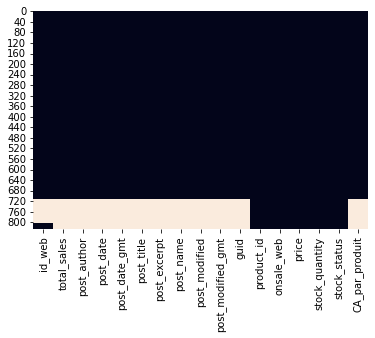

In [56]:
sns.heatmap( erp_liaison_web_1.isna(), cbar= False)

In [57]:
erp_liaison_web_1.describe()

,total_sales,post_author,onsale_web,price,stock_quantity,CA_par_produit
count,714.000000,714.000000,825.000000,825.000000,825.000000,714.000000
mean,4.012605,1.998599,0.869091,32.415636,26.496970,98.835574
std,8.518183,0.037424,0.337506,26.795849,45.892422,307.685071
min,0.000000,1.000000,0.000000,5.200000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,14.600000,1.000000,0.000000
50%,1.000000,2.000000,1.000000,24.400000,11.000000,15.250000
75%,4.000000,2.000000,1.000000,42.000000,34.000000,91.150000
max,96.000000,2.000000,1.000000,225.000000,578.000000,4704.000000


In [58]:
erp_liaison_web_1['id_web'].value_counts()

bon-cadeau-25-euros    1
16146                  1
15860                  1
15863                  1
15861                  1
                      ..
16186                  1
14371                  1
10459                  1
14372                  1
14680-1                1
Name: id_web, Length: 734, dtype: int64

In [59]:
erp_liaison_web_1['product_id'].value_counts()

4954    1
5768    1
5742    1
5743    1
5747    1
       ..
4664    1
4665    1
4666    1
4668    1
7329    1
Name: product_id, Length: 825, dtype: int64

In [60]:
erp_liaison_web_1.dtypes.value_counts()

object            7
float64           4
datetime64[ns]    4
int64             2
dtype: int64

<AxesSubplot:ylabel='None'>

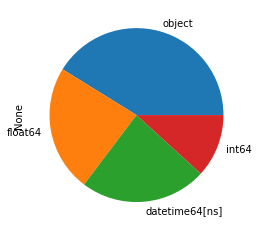

In [61]:
erp_liaison_web_1.dtypes.value_counts().plot.pie()

In [62]:
erp_liaison_web_1.describe()

,total_sales,post_author,onsale_web,price,stock_quantity,CA_par_produit
count,714.000000,714.000000,825.000000,825.000000,825.000000,714.000000
mean,4.012605,1.998599,0.869091,32.415636,26.496970,98.835574
std,8.518183,0.037424,0.337506,26.795849,45.892422,307.685071
min,0.000000,1.000000,0.000000,5.200000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,14.600000,1.000000,0.000000
50%,1.000000,2.000000,1.000000,24.400000,11.000000,15.250000
75%,4.000000,2.000000,1.000000,42.000000,34.000000,91.150000
max,96.000000,2.000000,1.000000,225.000000,578.000000,4704.000000


total_sales
post_author
price
CA_par_produit


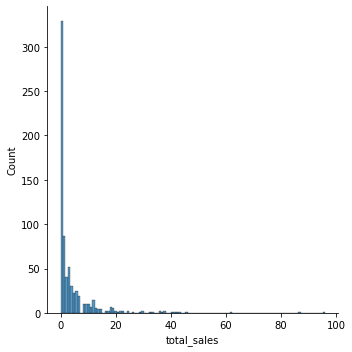

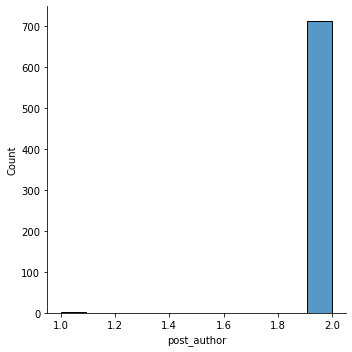

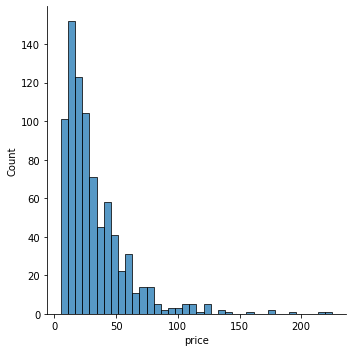

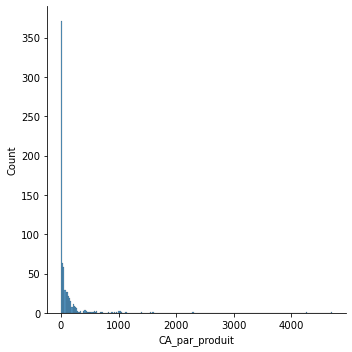

In [63]:
for col in erp_liaison_web_1.select_dtypes('float'):
    print(col)
    sns.displot(erp_liaison_web_1[col])

In [64]:
web_copie['id_web'].replace('', np.nan, inplace=True)
web_copie.sample(30)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
130,15717,0,0,0,0.0,2.0,taxable,2.0,2018-02-16 09:55:50,2018-02-16 08:55:50,...,closed,lucien-boillot-volnay-2017,2020-08-25 16:05:02,2020-08-25 14:05:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
63,15353,0,0,0,0.0,2.0,taxable,2.0,2018-02-13 10:56:04,2018-02-13 09:56:04,...,closed,zind-humbrecht-riesling-herrenweg-turckheim-2017,2020-06-03 14:35:02,2020-06-03 12:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
613,15775,0,0,0,0.0,0.0,taxable,2.0,2019-03-28 10:11:26,2019-03-28 09:11:26,...,closed,saumaize-michelin-saint-veran-creches-2018,2020-08-26 11:25:02,2020-08-26 09:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
575,11258,0,0,0,0.0,2.0,taxable,2.0,2019-03-13 14:02:06,2019-03-13 13:02:06,...,closed,huile-dolive-extra-vierge-planeta-50cl,2020-08-19 10:55:02,2020-08-19 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
521,13520,0,0,0,0.0,0.0,taxable,2.0,2018-11-26 10:21:02,2018-11-26 09:21:02,...,closed,thierry-germain-saumur-blanc-clos-romans-2016,2019-04-25 09:30:32,2019-04-25 07:30:32,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
29,15967,0,0,0,0.0,20.0,taxable,2.0,2018-02-12 13:17:53,2018-02-12 12:17:53,...,closed,oratoire-saint-martin-cairanne-haut-coustias-2016,2020-08-14 18:35:02,2020-08-14 16:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
592,15688,0,0,0,0.0,0.0,taxable,2.0,2019-03-19 10:51:29,2019-03-19 09:51:29,...,closed,chateau-saransot-dupre-listrac-medoc-2016,2020-07-06 17:45:03,2020-07-06 15:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
289,14657,0,0,0,0.0,3.0,taxable,2.0,2018-04-17 11:22:03,2018-04-17 09:22:03,...,closed,xavier-frissant-touraine-amboise-loree-des-fre...,2020-08-21 15:35:02,2020-08-21 13:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
360,13096,0,0,0,0.0,1.0,taxable,2.0,2018-04-19 13:29:50,2018-04-19 11:29:50,...,closed,maurice-schoech-cremant-dalsace-brut-rose-bull...,2020-08-20 15:35:02,2020-08-20 13:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
729,16152,0,0,0,0.0,0.0,taxable,2.0,2020-02-22 14:01:55,2020-02-22 13:01:55,...,closed,catherine-et-claude-marechal-pommard-la-chanie...,2020-07-16 11:45:03,2020-07-16 09:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [65]:
web_sku_null= web_copie.loc[(web_copie['id_web'].isnull())] 
web_sku_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             0 non-null      object        
 1   virtual            0 non-null      int64         
 2   downloadable       0 non-null      int64         
 3   rating_count       0 non-null      int64         
 4   average_rating     0 non-null      float64       
 5   total_sales        0 non-null      float64       
 6   tax_status         0 non-null      object        
 7   post_author        0 non-null      float64       
 8   post_date          0 non-null      datetime64[ns]
 9   post_date_gmt      0 non-null      datetime64[ns]
 10  post_title         0 non-null      object        
 11  post_excerpt       0 non-null      object        
 12  post_status        0 non-null      object        
 13  comment_status     0 non-null      object        
 14  ping_status        0 n

In [96]:
# justifier l'unicité de product_id
id_unique= erp_copie [ erp_copie.duplicated(['product_id'])]
print (id_unique)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


In [154]:
selected_columns = erp_copie[["product_id"]]
df1=selected_columns.copy()

In [142]:
dupes = {}
for c in df1:
    gb = df1.groupby(c).size()
    dupes[c] = gb[gb > 1].sum()

In [143]:
dupes

{'product_id': 0}

In [161]:
def Cle(x):
    if x.duplicated.size()>0:
        print ('unique')
    else:
        print ('doublon') 
        


<AxesSubplot:xlabel='price'>

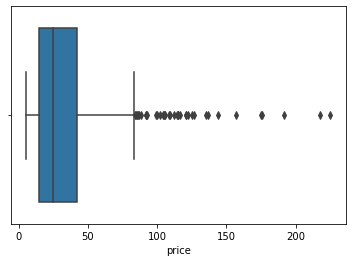

In [67]:
# boxplot
sns.boxplot (x=erp_liaison_web_1['price'])

In [68]:
outliers = []
def detect_outliers(data):
    threshold=3
    mean= np.mean(data)
    std=np.std(data)
    for i in data:
        z_score= (i-mean)/std
        if np.abs(z_score)> threshold:
             outliers.append(i)
    return outliers

In [166]:
# detecter les prix concidéré comme outliers :
df3 = pd.DataFrame(detect_outliers(erp_liaison_web_1['price']))

In [167]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       72 non-null     float64
dtypes: float64(1)
memory usage: 704.0 bytes


In [179]:
result = []
for value in erp_liaison_web_1["price"]:
    if value in detect_outliers(erp_liaison_web_1['price']):
        result.append("Premium")
    else:
        result.append("Normal")
erp_liaison_web_1["Result"] = result 

In [180]:
erp_liaison_web_2=erp_liaison_web_1.sort_values(by='price', ascending=False)
erp_liaison_web_2.head(20)

,id_web,total_sales,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,product_id,onsale_web,price,stock_quantity,stock_status,CA_par_produit,Result
200,15940,5.0,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,1125.0,Premium
426,14581,0.0,2.0,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,https://www.bottle-neck.fr/?post_type=product&...,5001,1,217.5,20,instock,0.0,Premium
587,14983,3.0,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,5892,1,191.3,10,instock,573.9,Premium
219,3510,13.0,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,2288.0,Premium
553,15185,0.0,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,5767,1,175.0,12,instock,0.0,Premium
222,7819,0.0,2.0,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Eau-de-Vie distillée à partir de raisins de Gr...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,4406,1,157.0,3,instock,0.0,Premium
725,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,4594,1,144.0,0,outofstock,NaN,Premium
382,14220,5.0,2.0,2018-05-15 10:23:41,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,"Ce Corton Charlemagne éblouit par son assise, ...",domaine-des-croix-corton-charlemagne-grand-cru...,2020-05-19 17:15:02,2020-05-19 15:15:02,https://www.bottle-neck.fr/?post_type=product&...,4904,1,137.0,13,instock,685.0,Premium
642,14923,2.0,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,6126,1,135.0,10,instock,270.0,Premium
202,12589,11.0,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,4355,1,126.5,2,instock,1391.5,Premium
